In [25]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    

In [26]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [27]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'MEDV')

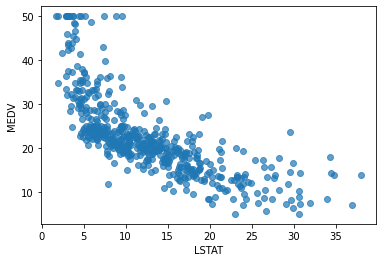

In [28]:
import matplotlib.pyplot as plt
plt.scatter(boston_df["LSTAT"], boston_df["MEDV"], alpha=0.7)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


In [29]:
lstat = boston_df[["LSTAT"]].values
medv = boston_df["MEDV"].values


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(lstat, medv)

LinearRegression()

Text(0, 0.5, 'MEDV')

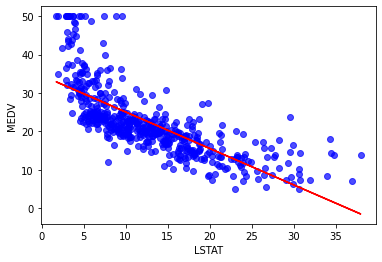

In [31]:
import matplotlib.pyplot as plt
plt.scatter(lstat, medv, color="blue", alpha=0.7)
plt.plot(lstat, model.predict(lstat), color="red")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


In [32]:
print(f"Slope: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Slope: [-0.95004935]
Intercept: 34.55384087938309


>  medv = 34.55 - 0.95 * lstat


In [33]:
x = boston_df[["LSTAT", "AGE"]].values
y = boston_df["MEDV"].values

In [34]:
model2 = LinearRegression()
model2.fit(x, y)
print(f"Intercept: {model2.intercept_}")
print(f"Slope: {model2.coef_}")

Intercept: 33.222760531792886
Slope: [-1.03206856  0.03454434]


In [35]:
x = boston_df.drop(["MEDV"], axis=1)
y = boston_df["MEDV"]
model = LinearRegression()
model.fit(x, y)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: 36.459488385090246
Slope: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


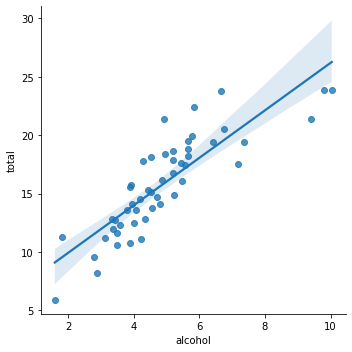

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_crashes = sns.load_dataset("car_crashes")
sns.lmplot(x="alcohol", y="total", data=car_crashes)


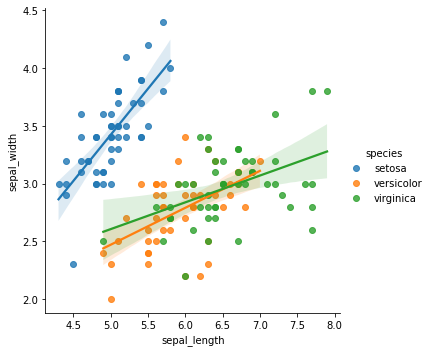

In [37]:
iris = sns.load_dataset("iris")
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

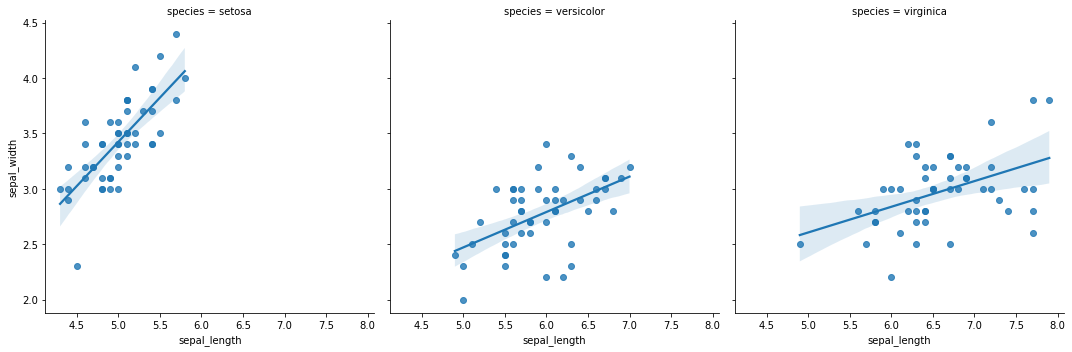

In [38]:
sns.lmplot(x="sepal_length", y="sepal_width", col="species", data=iris)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

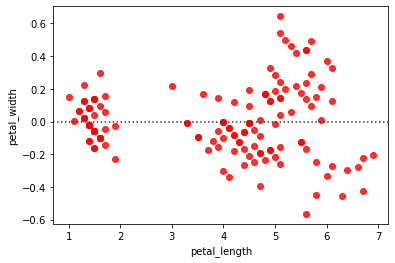

In [39]:
sns.residplot(x="petal_length", y="petal_width", data=iris, color="red")

In [40]:
x = boston_df[["LSTAT", "AGE"]].values
y = boston_df["MEDV"].values
model2 = LinearRegression()
model2.fit(x, y)
model2.score(x, y)

0.5512689379421003

In [41]:
yhat = model2.predict(x)
RSS = sum((y - yhat) ** 2)
TSS = sum((y - np.mean(y)) ** 2)
R2 = 1 - RSS / TSS
R2

0.5512689379421007

In [42]:
# fixed R2
n = len(y)
d = x.shape[1]
adj_r2 = 1 - (1 - R2) * (n - 1) / (n - d - 1)
adj_r2

0.5494847190074769

In [43]:
boston_df["LSTAT2"] = boston_df["LSTAT"] ** 2
boston_df["LSTAT3"] = boston_df["LSTAT"] ** 3
X = boston_df[["LSTAT", "LSTAT2", "LSTAT3"]].values
y = boston_df["MEDV"].values


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

Text(10, 45, '$medv = \\beta_0 + \\beta_1.lstat + \\beta_2.lstat^2 + \\beta_3.lstat^3$')

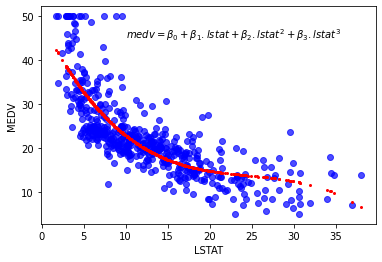

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], y, color="blue", alpha=0.7)
plt.scatter(X[:,0], model.predict(X), s = 4, color="red")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.text(10, 45, r"$medv = \beta_0 + \beta_1.lstat + \beta_2.lstat^2 + \beta_3.lstat^3$")


In [46]:
model = LinearRegression()
model.fit(lstat, medv)
medv_guess = model.predict(lstat)
from sklearn.metrics import mean_squared_error
rmse_sklearn = mean_squared_error(medv, medv_guess, squared=False)
rmse = np.sqrt(np.mean((medv - medv_guess) ** 2))

print(f"{rmse_sklearn= } {rmse=}")

rmse_sklearn= 6.20346413142642 rmse=6.20346413142642


In [47]:
np.std(medv)

9.188011545278203

In [48]:
#boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
X = boston_df.drop(["MEDV"], axis=1)
y = boston_df["MEDV"]
model = LinearRegression()
model.fit(X, y)
n = len(y)
d = X.shape[1]
y_hat = model.predict(X)
rss = sum((y - y_hat) ** 2)
var = np.var(y- y_hat)
cp = (rss + 2*d*var) / n
cp

18.63330944487652

Cross validation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(lstat, medv, test_size=0.2, random_state=42)


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
rmse

5.789606996393181

In [51]:
RSS = sum((y_test - y_hat) ** 2)
TSS = sum((y_test - np.mean(y_test)) ** 2)
R2 = 1 - RSS / TSS
R2

0.5429180422970386

In [52]:
d = X_test.shape[1]
adj_r2 = 1 - (1 - R2) * (n - 1) / (n - d - 1)
adj_r2_2 = 1 - (RSS / (n - d - 1)) / (TSS / (n - 1))
print(f"{adj_r2=} {adj_r2_2=}")

adj_r2=0.5420111336508024 adj_r2_2=0.5420111336508024


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cross_R2 = cross_val_score(model, X_train, y_train, cv=10, scoring="r2")
np.mean(cross_R2)

0.5167064348948699

### Ridge 

In [54]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1, normalize=True)
ridge_model.fit(X,y)
ridge_model.score(X,y)


/usr/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.7539903297634074

In [55]:
alpha_values = np.logspace(-4, 0.1, 100)

ridge_R2 = []

ridge_model = Ridge(normalize=True)

for alpha in alpha_values:
    ridge_model.alpha = alpha
    ridge_cv = cross_val_score(ridge_model, X, y, cv=10, scoring="r2")
    ridge_R2.append(np.mean(ridge_cv))
    
ind = np.argmax(ridge_R2)


/usr/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import

In [56]:
ind

73

In [57]:
ind2 = ridge_R2.index(max(ridge_R2))
ind2

73

In [58]:
alpha_values[ind]

0.10549510852385587

### Lasso


In [59]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1, normalize=True)
lasso_model.fit(X,y)
lasso_model.score(X,y)


/usr/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.5827830418182642

In [61]:
print(f"{lasso_model.intercept_=} {lasso_model.coef_=}")

lasso_model.intercept_=13.957552992158885 lasso_model.coef_=array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439, -0.        , -0.        ])
